## Clustering of field plots data RS observation
-----

In [43]:
import pandas as pd
import geopandas as gpd
import rasterio as rio 
from rasterio.mask import mask as crop_mask
import os 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, spectral_clustering
from sklearn.preprocessing import StandardScaler

## 1. Read field-plots data 

In [7]:
gdf_30m = gpd.read_file('../forest_taxation/Classification/shape_data/super_resolution_points.geojson')
gdf_8m = gpd.read_file('../forest_taxation/Classification/shape_data/ROI_plots70/ROI_plots70.shp')

In [6]:

gdf['geometry'][0].area

6326.354891699671

In [ ]:
def crop_tiff_by_shape(shape,folder_with_tiff_files, return_mean=False):
        """
        Function to crop GeoTiff files by shape and return pd.DataFrame
        with indices
        
        Input: shape -> shapely, polygon
               folder_with_tiff_files -> folder with GeoTiff files
               compute_mean -> False, compute mean for entire dataset and return vector
               
               Structure of folder: 
               2019-04-10.tiff
               2019-05-15.tiff
               ...
               
        Output: pd.DataFrame() -> cols: date, Red, NDVI 
        
                        date generated from GeoTiff files
        
        """
        
        col_names = ["B01","B02","B03","B04","B05","B06","B07","B08","B8A","B09","B11","B12","CLM"]
        path=folder_with_tiff_files
        list_of_geotiff = [tiff for tiff in os.listdir(path) if ('croped' not in tiff) and ('tiff' in tiff)]
        df_indices_field = pd.DataFrame(columns = ['date',  *col_names, "NDVI"])
        dates_of_images = []
        for element in sorted(list_of_geotiff_and_dates):
            dates_of_images.append(element.split('.')[0])
        csv_name_list=[]
        for date in dates_of_images:
            for chanel in col_names:
                csv_name_list.extend([f'{chanel}_{date}'])

        for tiff_file in list_of_geotiff:
            path_to_tiff_file = os.path.join(folder_with_tiff_files, tiff_file)
            output_filename = os.path.splitext(path_to_tiff_file)[0]+'_croped.tiff'
            if output_filename.split('/')[-1] in os.listdir(folder_with_tiff_files):
                print(output_filename.split('/')[-1])
                if return_mean==True:
#                     row = self.compute_mean(output_filename)
                    df_indices_field.loc[len(df_indices_field)] = row
            else:
                print(' no cropped files')
                with rasterio.open(path_to_tiff_file) as src:
                    out_image, out_transform = mask(src, [shape], crop=True) # SUPER KEK - [shape] works, shape - doesn't
                    out_meta = src.meta 

                # Save clipped imagery
                out_meta.update({"driver": "GTiff",
                                 "height": out_image.shape[1],
                                 "width": out_image.shape[2],
                                 "transform": out_transform})

                with rasterio.open(output_filename, "w", **out_meta) as dest:
                    dest.write(out_image)
                if return_mean==True:
#                     row = self.compute_mean(output_filename)
                    df_indices_field.loc[len(df_indices_field)] = row
        return df_indices_field


In [84]:
shape = gdf_30m.iloc[0, -1]

In [85]:
col_names = ["B01","B02","B03","B04","B05","B06","B07","B08","B8A","B09","B11","B12","CLM"]
path='/Users/mikhailgasanov/Yandex.Disk.localized/STRIP/Bratsk/Sentinel2_2019_10_meters/'
year = 2019
list_of_geotiff = [tiff for tiff in os.listdir(path) if (str('-') in tiff) and ('tiff' in tiff)]

df_indices_field = pd.DataFrame(columns = ['date',  *col_names, "NDVI"])

dates_of_images = []



for tiff_file in sorted(list_of_geotiff):
    path_to_tiff_file = os.path.join(path, tiff_file)
    with rio.open(path_to_tiff_file) as src:
        out_image, out_transform = crop_mask(src, [shape], crop=True) # SUPER KEK - [shape] works, shape - doesn't
        out_meta = src.meta 
        x = out_image[:12, ...].reshape(12, out_image.shape[1]*out_image.shape[2])
    _df = pd.DataFrame(x.T, columns=col_names[:-1])
#     df

In [ ]:
def drop_nan_values_from_polygon(df:pd.DataFrame)->pd.DataFrame:
    mask 

### 3. Plots cloudy images

In [89]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np


# Path to Sentinell-2 L2A tiff file with B01, B02, B03, B04, etc bands
fname='/path/to/file.tiff'


def plot_RGB(fname: str)->None: 
    img = rasterio.open(fname)

    red = img.read(4)
    green = img.read(3)
    blue = img.read(2)



    def normalize(band):
        band_min, band_max = (band.min(), band.max())
        return ((band-band_min)/((band_max - band_min)))


    def brighten(band):
        alpha=0.13
        beta=0
        return np.clip(alpha*band+beta, 0,255)

    red_b=brighten(red)
    blue_b=brighten(blue)
    green_b=brighten(green)

    red_bn = normalize(red_b)
    green_bn = normalize(green_b)
    blue_bn = normalize(blue_b)

    rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
    plt.imshow(rgb_composite_bn)

KeyboardInterrupt: 

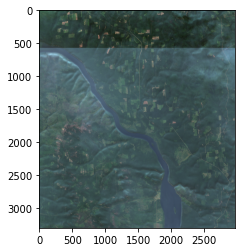

In [90]:
for tiff_file in sorted(list_of_geotiff):
    path_to_tiff_file = os.path.join(path, tiff_file)
    plot_RGB(path_to_tiff_file)

In [88]:
_df.sum(axis=0)


B01      4318
B02     14126
B03     20706
B04     15129
B05     35511
B06     81440
B07     91322
B08     98810
B8A     97239
B09    100734
B11     44826
B12     23760
dtype: int64

In [ ]:
_

In [66]:
_df = pd.DataFrame(out_image[:12, ...].reshape(12, out_image.shape[1]*out_image.shape[2]).T)

In [64]:
_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,43,149,151,140,316,639,710,621,772,1116,382,223
4,43,133,146,128,316,639,710,501,772,1116,382,223
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,0,0


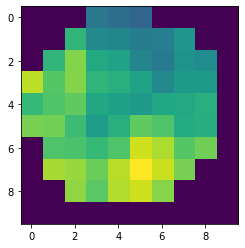

In [73]:
col_names = ["B01","B02","B03","B04","B05","B06","B07","B08","B8A","B09","B11","B12","CLM"]
path='/Users/mikhailgasanov/Yandex.Disk.localized/STRIP/Bratsk/Sentinel2_2019_10_meters/'
year = 2019
list_of_geotiff = [tiff for tiff in os.listdir(path) if (str('-') in tiff) and ('tiff' in tiff)]

df_indices_field = pd.DataFrame(columns = ['date',  *col_names, "NDVI"])

dates_of_images = []



for tiff_file in sorted(list_of_geotiff):
    path_to_tiff_file = os.path.join(path, tiff_file)
    with rio.open(path_to_tiff_file) as src:
        out_image, out_transform = crop_mask(src, [shape], crop=True) # SUPER KEK - [shape] works, shape - doesn't
        out_meta = src.meta 
        x = out_image[:12, ...].reshape(12, out_image.shape[1]*out_image.shape[2])
    _df = pd.DataFrame(x.T, columns=col_names[:-1])
#     df
plt.imshow(out_image[3,...])

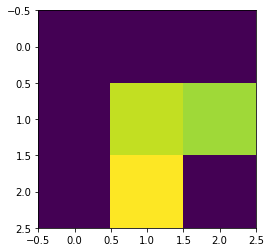

In [75]:
shape = gdf_8m.iloc[0,-1]
col_names = ["B01","B02","B03","B04","B05","B06","B07","B08","B8A","B09","B11","B12","CLM"]
path='/Users/mikhailgasanov/Yandex.Disk.localized/STRIP/Bratsk/Sentinel2_2019_10_meters/'
year = 2019
list_of_geotiff = [tiff for tiff in os.listdir(path) if (str('-') in tiff) and ('tiff' in tiff)]

df_indices_field = pd.DataFrame(columns = ['date',  *col_names, "NDVI"])

dates_of_images = []



for tiff_file in sorted(list_of_geotiff):
    path_to_tiff_file = os.path.join(path, tiff_file)
    with rio.open(path_to_tiff_file) as src:
        out_image, out_transform = crop_mask(src, [shape], crop=True) # SUPER KEK - [shape] works, shape - doesn't
        out_meta = src.meta 
        x = out_image[:12, ...].reshape(12, out_image.shape[1]*out_image.shape[2])
    _df = pd.DataFrame(x.T, columns=col_names[:-1])
#     df

plt.imshow(out_image[3,...])

In [16]:
gdf_8m.crs

<Derived Projected CRS: EPSG:32647>
Name: WGS 84 / UTM zone 47N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 96°E and 102°E, northern hemisphere between equator and 84°N, onshore and offshore. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Myanmar (Burma). Russian Federation. Thailand.
- bounds: (96.0, 0.0, 102.0, 84.0)
Coordinate Operation:
- name: UTM zone 47N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich